In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File to Load (Remember to Change These)
AAPL_ticker = Path("Stock_data/AAPL.csv")
AAPL_stock = pd.read_csv(AAPL_ticker)
AAPL_stock["Ticker"]= "AAPL"

AMZN_ticker = Path("Stock_data/AMZN.csv")
AMZN_stock = pd.read_csv(AMZN_ticker)
AMZN_stock["Ticker"]= "AMZN"

CSCO_ticker = Path("Stock_data/CSCO.csv")
CSCO_stock = pd.read_csv(CSCO_ticker)
CSCO_stock["Ticker"]= "CSCO"


EBAY_ticker = Path("Stock_data/EBAY.csv")
EBAY_stock = pd.read_csv(EBAY_ticker)
EBAY_stock["Ticker"]= "EBAY"

GOOG_ticker = Path("Stock_data/GOOG.csv")
GOOG_stock = pd.read_csv(GOOG_ticker)
GOOG_stock["Ticker"]= "GOOG"

IBM_ticker = Path("Stock_data/IBM.csv")
IBM_stock = pd.read_csv(IBM_ticker)
IBM_stock["Ticker"]= "IBM"

MSFT_ticker = Path("Stock_data/MSFT.csv")
MSFT_stock = pd.read_csv(MSFT_ticker)
MSFT_stock["Ticker"]= "MSFT"

NVDA_ticker = Path("Stock_data/NVDA.csv")
NVDA_stock = pd.read_csv(NVDA_ticker)
NVDA_stock["Ticker"]= "NVDA"

T_ticker = Path("Stock_data/T.csv")
T_stock = pd.read_csv(T_ticker)
T_stock["Ticker"]= "T"


TSLA_ticker = Path("Stock_data/TSLA.csv")
TSLA_stock = pd.read_csv(TSLA_ticker)
TSLA_stock["Ticker"]= "TSLA"

# student_data= Path("Resources/students_complete.csv")

In [3]:
#Combining all the Ticker data into a single DataFrame
stock_combined_df = pd.concat([AAPL_stock,AMZN_stock,CSCO_stock,EBAY_stock,GOOG_stock,IBM_stock,MSFT_stock,NVDA_stock,T_stock,TSLA_stock],ignore_index=True)

In [15]:
data1=stock_combined_df.copy()
data1.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL


In [23]:
data1['Date']=pd.to_datetime(data1['Date'])

In [24]:
data1['Year']=data1['Date'].dt.year

In [25]:
data1['Month']=data1['Date'].dt.strftime('%B')

<Axes: xlabel='Month'>

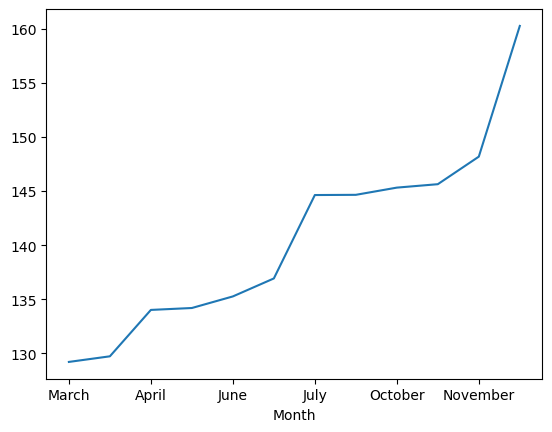

In [27]:
data1[(data1['Ticker'] == "AAPL") & (data1['Year'] == 2021)].groupby(['Month'])['Close'].mean().sort_values().plot()

In [28]:
data1.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Ticker,Year,Month
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,AAPL,1980,December
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,AAPL,1980,December
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,AAPL,1980,December
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,AAPL,1980,December
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,AAPL,1980,December


In [29]:
data1.Ticker.unique()

array(['AAPL', 'AMZN', 'CSCO', 'EBAY', 'GOOG', 'IBM', 'MSFT', 'NVDA', 'T',
       'TSLA'], dtype=object)

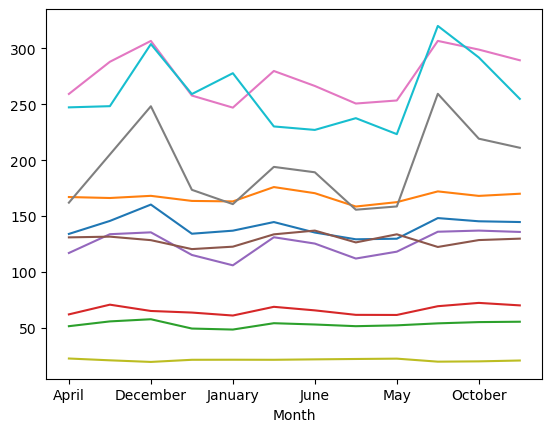

In [30]:
for i in data1.Ticker.unique():
    data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()
    

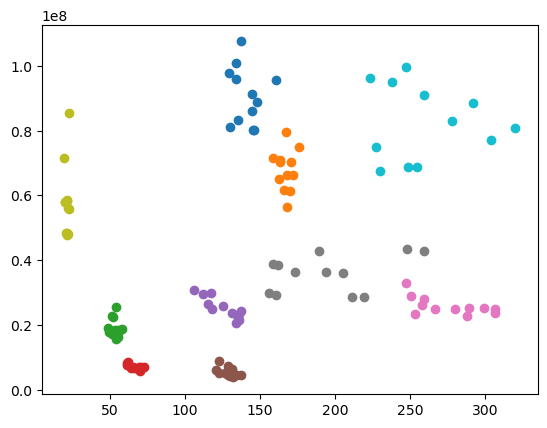

In [36]:
for i in data1.Ticker.unique():
    plt.scatter(x=data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker==i)&(data1.Year==2021)].groupby(['Month'])['Volume'].mean())

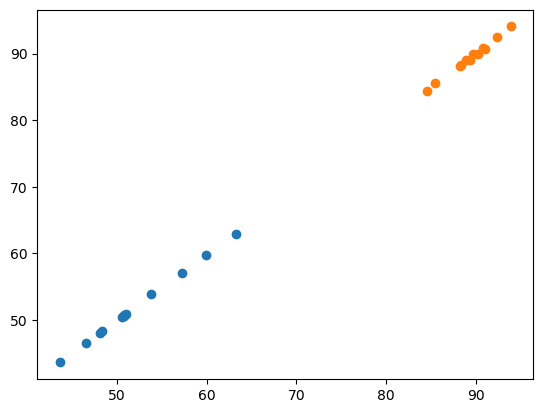

In [47]:
plt.scatter(x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Open'].mean())
    
plt.scatter(x=data1[(data1.Ticker=="AMZN")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AMZN")&(data1.Year==2019)].groupby(['Month'])['Open'].mean())

y = -112.88x + 170.66
-0.4580926996775942


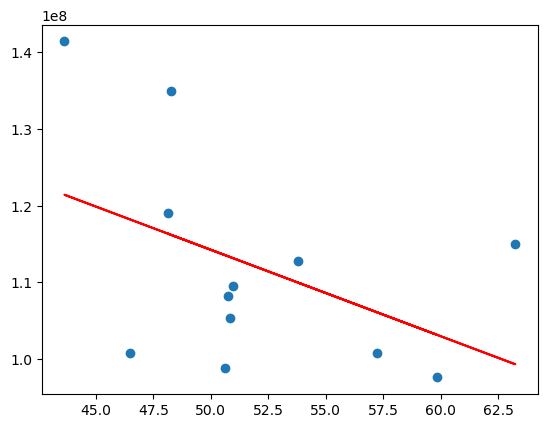

In [68]:
   plt.scatter(x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean(),
                y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Volume'].mean())
from scipy.stats import linregress


x=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Close'].mean()
y=data1[(data1.Ticker=="AAPL")&(data1.Year==2019)].groupby(['Month'])['Volume'].mean()


(slope,intercept, rvalue, pvalue, stderr)=linregress(x, y)
regress_values= x*slope+intercept
line_eq = "y = " + str(round(slope/10000,2)) + "x + " + str(round(intercept/1000000,2))
plt.plot(x,regress_values, color='red')

plt.annotate(line_eq, (55,1.35),fontsize = 10, color="red")

print(line_eq)

print(rvalue) 

<Axes: xlabel='Month'>

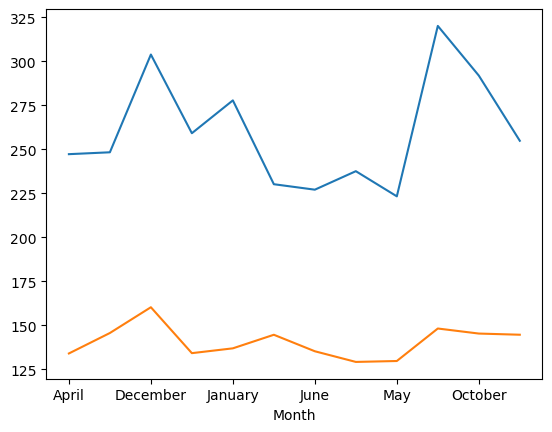

In [31]:
data1[(data1.Ticker=='TSLA')&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()
data1[(data1.Ticker=='AAPL')&(data1.Year==2021)].groupby(['Month'])['Close'].mean().plot()

In [ ]:
#Checking for NAs
stock_combined_df.isna().sum()

In [ ]:
#Filtering the data based on the 10 year period
stock_combined_df['Date'] = pd.to_datetime(stock_combined_df['Date'], format='%d-%m-%Y')
start_date = '2010-01-01'
end_date = '2021-12-31'

stocks_filtered_df = stock_combined_df[(stock_combined_df['Date'] >= start_date) & (stock_combined_df['Date'] <= end_date)]

In [ ]:
stocks_filtered_df.head(1)

In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
average_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].mean()

# Reset the index to make 'Ticker' and 'Year' regular columns
average_close_by_ticker_year = average_close_by_ticker_year.reset_index()

# Rename the columns for clarity
average_close_by_ticker_year.columns = ['Ticker', 'Year', 'Average_Close']

# Display the resulting DataFrame
average_close_by_ticker_year


In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
median_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].median()

# Reset the index to make 'Ticker' and 'Year' regular columns
median_close_by_ticker_year = median_close_by_ticker_year.reset_index()

# Rename the columns for clarity
median_close_by_ticker_year.columns = ['Ticker', 'Year', 'Median_Close']

# Display the resulting DataFrame
median_close_by_ticker_year

In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
var_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].var()

# Reset the index to make 'Ticker' and 'Year' regular columns
var_close_by_ticker_year = var_close_by_ticker_year.reset_index()

# Rename the columns for clarity
var_close_by_ticker_year.columns = ['Ticker', 'Year', 'Variance_Close']

# Display the resulting DataFrame
var_close_by_ticker_year

In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
std_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].std()

# Reset the index to make 'Ticker' and 'Year' regular columns
std_close_by_ticker_year = std_close_by_ticker_year.reset_index()

# Rename the columns for clarity
std_close_by_ticker_year.columns = ['Ticker', 'Year', 'StandardDev_Close']

# Display the resulting DataFrame
std_close_by_ticker_year

In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
min_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].min()

# Reset the index to make 'Ticker' and 'Year' regular columns
min_close_by_ticker_year = min_close_by_ticker_year.reset_index()

# Rename the columns for clarity
min_close_by_ticker_year.columns = ['Ticker', 'Year', 'Minimum_Close']

# Display the resulting DataFrame
min_close_by_ticker_year

In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
max_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].max()

# Reset the index to make 'Ticker' and 'Year' regular columns
max_close_by_ticker_year = max_close_by_ticker_year.reset_index()

# Rename the columns for clarity
max_close_by_ticker_year.columns = ['Ticker', 'Year', 'Maximum_Close']

# Display the resulting DataFrame
max_close_by_ticker_year

In [ ]:
stock_combined_df['Ticker'].dtypes

In [ ]:

# Define your categorization logic as a function
def categorize_ticker(ticker_symbol):
    if ticker_symbol in ['AAPL', 'AMZN', 'CSCO', 'EBAY', 'GOOG', 'MSFT', 'NVDA','TSLA']:
        return "NASDAQ"
    elif ticker_symbol in ["T", "IBM"]:
        return "NYSE"
    else:
        return "Other"
# Create a new column to store the categories
max_close_by_ticker_year["Stock_Listing"] = None
# Use a for loop to categorize ticker symbols
for index, row in max_close_by_ticker_year.iterrows():
    ticker_symbol = row["Ticker"]
    category = categorize_ticker(ticker_symbol)
    max_close_by_ticker_year.at[index, "Stock_Listing"] = category
# Print the resulting DataFrame
print(max_close_by_ticker_year)

In [ ]:
max_close_by_ticker_year.loc[max_close_by_ticker_year['Ticker']=="IBM"]

In [ ]:
# Extract the year from the 'Date' column and store it in a new column 'Year'
stocks_filtered_df['Year'] = stocks_filtered_df['Date'].dt.year

# Group the DataFrame by 'Ticker' and 'Year' and calculate the mean of the 'Close' column for each group
SEM_close_by_ticker_year = stocks_filtered_df.groupby(['Ticker', 'Year'])['Close'].sem()

# Reset the index to make 'Ticker' and 'Year' regular columns
SEM_close_by_ticker_year = SEM_close_by_ticker_year.reset_index()

# Rename the columns for clarity
SEM_close_by_ticker_year.columns = ['Ticker', 'Year', 'SEM']

# Display the resulting DataFrame
SEM_close_by_ticker_year

In [ ]:
Summary_Stats_Stock = pd.merge(
    average_close_by_ticker_year,
    median_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    var_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    std_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    min_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    max_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock = pd.merge(
    Summary_Stats_Stock,
    SEM_close_by_ticker_year,
    on=["Ticker", "Year"],
    how='inner'
)

Summary_Stats_Stock

In [ ]:
dff=Summary_Stats_Stock[Summary_Stats_Stock.Ticker=='TSLA'][['Year','Average_Close']]

In [ ]:
plt.scatter(dff['Year'],dff['Average_Close'])

In [ ]:
groupby_stocks_avg=Summary_Stats_Stock.groupby("Ticker")["Average_Close"].mean()
groupby_stocks_avg.head()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
x = Summary_Stats_Stock["Ticker"].unique()
y = groupby_stocks_avg

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel("Ticker")
plt.ylabel("Average Close")
plt.title("Average Close between 2010 to 2020")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()
